In [2]:
import datasets
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import gensim.downloader
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding as LLE
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import kneighbors_graph

In [3]:
# CM1
# Pick the climate_fever Data
dataset = datasets.load_dataset('climate_fever', split="test")
sub_data = dataset['claim']
sub_data_2 = dataset['evidences']

Using custom data configuration default
Reusing dataset climate_fever (C:\Users\beich\.cache\huggingface\datasets\climate_fever\default\1.0.1\3b846b20d7a37bc0019b0f0dcbde5bf2d0f94f6874f7e4c398c579f332c4262c)


In [4]:
sub_evidence = []
for i in sub_data_2:
    for j in i:
        sub_evidence.append(j['article'])
        sub_evidence.append(j['evidence'])

# Combine the evidence and article
sub_data.extend(sub_evidence)


In [5]:
# Use NLTK to Preprocess the data
# Step 1 Tokenize the sentence
data_token = []
for k in sub_data:
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    token = tokenizer.tokenize(k)
    data_token.append(token)

# LowerCase
data_token_lower = []
for s in data_token:
    s_lowered = []
    for w in s:
        w_lower = w.lower()
        s_lowered.append(w_lower)
    data_token_lower.append(s_lowered)

In [6]:
# Step 2 Remove Stop Words and Mark
words = stopwords.words('english')

data_filtered = []
for s in data_token_lower:
    s_filtered = []
    for w in s:
        if w not in words:
            s_filtered.append(w)
    data_filtered.append(s_filtered)


In [7]:
# Step 3 Lemmatize the word
wordnet_lemmatizer = WordNetLemmatizer()

data_lemmatizer = []
for s in data_filtered:
    s_lemmatizer = []
    for w in s:
        word = wordnet_lemmatizer.lemmatize(w)
        s_lemmatizer.append(w)
    data_lemmatizer.append(s_lemmatizer)

In [8]:
# Prepare Train, Test, Validation Data
data_train, data_test = train_test_split(data_lemmatizer, test_size=0.2, random_state=0)

In [9]:
# Use the Full Data to set up model
model = Word2Vec(data_lemmatizer, min_count=1, size=100)
model.save("word2vec_cm1.model")


In [10]:
print(model.most_similar('earth'))
print(model.most_similar('groups'))
print(model.most_similar('human'))
print(model.most_similar('temperatures'))
print(model.most_similar('ocean'))
print(model.most_similar('ice'))

# Analysis

[('reduction', 0.95198655128479), ('increased', 0.947887659072876), ('currently', 0.9440896511077881), ('causing', 0.9401228427886963), ('resulting', 0.9377080202102661), ('led', 0.936177134513855), ('mixes', 0.9360933303833008), ('traps', 0.9355261325836182), ('radiation', 0.9340364933013916), ('long', 0.9338586330413818)]
[('acc', 0.9974123239517212), ('method', 0.9964141845703125), ('agw', 0.9959201812744141), ('resilient', 0.995909571647644), ('policy', 0.9948134422302246), ('example', 0.9947564601898193), ('policies', 0.9947247505187988), ('believe', 0.9946251511573792), ('declaration', 0.9945161938667297), ('discussions', 0.99446702003479)]
[('induced', 0.9915308952331543), ('activities', 0.984954297542572), ('anthropogenic', 0.9791049361228943), ('activity', 0.9695702195167542), ('mainly', 0.963921070098877), ('principal', 0.9496508240699768), ('driver', 0.9442074298858643), ('responsible', 0.9440945386886597), ('influence', 0.9412922859191895), ('caused', 0.9399508833885193)]
[

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  after removing the cwd from sys.path.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `most_simil

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to de

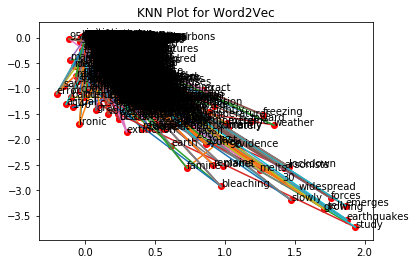

In [34]:
# KNN Graph
words = model.wv.vocab
X = model.wv.vectors

for i, word in enumerate(words):
    plt.scatter(X[i][0],X[i][1], color='red')
    plt.annotate(word, xy=(X[i][0], X[i][1]))
    word_sim = model.most_similar(word)[0][0]
    index = model.wv.vocab[word_sim].index
    x_values = [X[i][0], X[index][0]]
    y_values = [X[i][1], X[index][1]]
    plt.plot(x_values, y_values, color='blue')
plt.title("KNN Plot for Word2Vec")
plt.show()

In [ ]:
# Find arithmetic relationships
print(model.most_similar(positive=["summer", "ice"], negative=["warm"]))
# arithmetic relationships 1
# "summer" - "warm" + "ice" = "antarctic"
print(model.most_similar(positive=["winter", "warm"], negative=["ice"]))
# arithmetic relationships 2
# "winter" - "ice" + "warm" = "hottest"
print(model.most_similar(positive=["carbon", "global"], negative=["temperature"]))
# arithmetic relationships 3
# "carbon" - "temperature" + "global" = "greenhouse"
print(model.most_similar(positive=["year", "month"], negative=["period"]))
# arithmetic relationships 4
# "year" - "period" + "month" = 29"
print(model.most_similar(positive=["gdp", "usd"], negative=["america"]))
# arithmetic relationships 5
# "gdp" - "america" + "usd" = "billion"

In [ ]:
# Compare with Model
glove_vectors = gensim.downloader.load('glove-wiki-gigaword-50')
word_vectors = gensim.downloader.load('word2vec-google-news-300')

In [ ]:
v1 = glove_vectors.wv["summer"] + glove_vectors.wv["ice"] - glove_vectors.wv["warm"]
v2 = glove_vectors.wv["antarctic"]
print(cosine_similarity([v1], [v2]))
# In glove-wiki-gigaword-50 cosine similarity between "summer" - "warm" + "ice" and "antarctic" is 0.3542636
v1 = glove_vectors.wv["summer"] + glove_vectors.wv["warm"] - glove_vectors.wv["ice"]
v2 = glove_vectors.wv["hottest"]
print(cosine_similarity([v1], [v2]))
# In glove-wiki-gigaword-50 cosine similarity between "winter" - "ice" + "warm"  and "hottest" is 0.3487353
v1 = glove_vectors.wv["carbon"] + glove_vectors.wv["global"] - glove_vectors.wv["temperature"]
v2 = glove_vectors.wv["greenhouse"]
print(cosine_similarity([v1], [v2]))
# In glove-wiki-gigaword-50 cosine similarity between "carbon" - "temperature" + "global" and "greenhouse" is 0.65176284
v1 = glove_vectors.wv["year"] + glove_vectors.wv["month"] - glove_vectors.wv["period"]
v2 = glove_vectors.wv["29"]
print(cosine_similarity([v1], [v2]))
# In glove-wiki-gigaword-50 cosine similarity between "year" - "period" + "month" and "29" is 0.597962
v1 = glove_vectors.wv["gdp"] + glove_vectors.wv["usd"] - glove_vectors.wv["america"]
v2 = glove_vectors.wv["billion"]
print(cosine_similarity([v1], [v2]))
# In glove-wiki-gigaword-50 cosine similarity between "gdp" - "america" + "usd"  and "billion" is 0.5392937

In [ ]:
v1 = word_vectors.wv["summer"] + word_vectors.wv["ice"] - word_vectors.wv["warm"]
v2 = word_vectors.wv["antarctic"]
print(cosine_similarity([v1], [v2]))
# In word2vec-google-news-300 cosine similarity between "summer" - "warm" + "ice" and "antarctic" is 0.18382485
v1 = word_vectors.wv["summer"] + word_vectors.wv["warm"] - word_vectors.wv["ice"]
v2 = word_vectors.wv["hottest"]
print(cosine_similarity([v1], [v2]))
# In word2vec-google-news-300 cosine similarity between "winter" - "ice" + "warm"  and "hottest" is 0.21175683
v1 = word_vectors.wv["carbon"] + word_vectors.wv["global"] - word_vectors.wv["temperature"]
v2 = word_vectors.wv["greenhouse"]
print(cosine_similarity([v1], [v2]))
# In word2vec-google-news-300 cosine similarity between "carbon" - "temperature" + "global" and "greenhouse" is 0.07439865
# v1 = word_vectors.wv["year"] + word_vectors.wv["month"] - word_vectors.wv["period"]
#v2 = word_vectors.wv["29"]
#print(cosine_similarity([v1], [v2]))
# In word2vec-google-news-300 there is no word '29', therefore can not be compared
v1 = word_vectors.wv["gdp"] + word_vectors.wv["usd"] - word_vectors.wv["america"]
v2 = word_vectors.wv["billion"]
print(cosine_similarity([v1], [v2]))
# In word2vec-google-news-300 cosine similarity between "gdp" - "america" + "usd"  and "billion" is 0.21543184



In [ ]:
# CM2
# Dimensionality of the existing Model is 100
model_Train = Word2Vec(data_train, min_count=1, size=100)
model_Test = Word2Vec(data_test, min_count=1, size=100)
X_train = model_Train.wv.vectors
X_test = model_Test.wv.vectors



In [ ]:
# Step 1 Use Validation set to find the Dimension
pca = PCA(n_components=100)
pca.fit(X_train)
importance = pca.explained_variance_ratio_
plt.plot(range(1,101),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue ratio of PCA')
plt.grid()
plt.show()
# From Scree plot, 13 dimension will cover more than 90% of the variance


In [ ]:
# Step 2
# Train the PCA
pca = PCA(n_components=13)
pca.fit(X_train)
# Transform the Test Set
result = pca.transform(X_test)

In [ ]:
# Create PairPlot
df = pd.DataFrame(result, columns = ['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10','PCA11','PCA12', 'PCA13'])
df1 = df[['PCA1','PCA2','PCA3','PCA4']]
sns.pairplot(df1)
plt.title("PairPlot for first four dimensions of PCA")
plt.show()




In [ ]:
# Analyze similarity
val_before = print(model_Test.similarity("global", "warm"))
vocab_num = model_Test.wv.vocab["global"].index
vocab_similiar_num= model_Test.wv.vocab["warm"].index
vocab_vector = result[vocab_num]
vocab_similiar_vector = result[vocab_similiar_num]
val_out = cosine_similarity([vocab_vector], [vocab_similiar_vector])
print("Cosine Similarity between 'global' and 'warm' at word2vec is: ", val_before)
print("Cosine Similarity between 'global' and 'warm' after PCA is: ", val_out)


val_before = print(model_Test.similarity("carbon", "co2"))
vocab_num = model_Test.wv.vocab["carbon"].index
vocab_similiar_num= model_Test.wv.vocab["co2"].index
vocab_vector = result[vocab_num]
vocab_similiar_vector = result[vocab_similiar_num]
val_out = cosine_similarity([vocab_vector], [vocab_similiar_vector])
print("Cosine Similarity between 'carbon' and co2' at word2vec is: ", val_before)
print("Cosine Similarity between 'carbon' and 'co2' after PCA is: ", val_out)

val_before = print(model_Test.similarity("summer", "hot"))
vocab_num = model_Test.wv.vocab["summer"].index
vocab_similiar_num= model_Test.wv.vocab["hot"].index
vocab_vector = result[vocab_num]
vocab_similiar_vector = result[vocab_similiar_num]
val_out = cosine_similarity([vocab_vector], [vocab_similiar_vector])
print("Cosine Similarity between 'summer' and 'hot' at word2vec is: ", val_before)
print("Cosine Similarity between 'summer' and 'hot' after PCA is: ", val_out)

In [ ]:
# CM3
# Train the LLE
lle = LLE(n_components=4, n_neighbors=5, random_state=0)
lle.fit(X_test)
# Transform the Test Set
result = lle.transform(X_test)

In [ ]:
# Create PairPlot
df = pd.DataFrame(result, columns = ['LLE1','LLE2','LLE3','LLE4'])
df1 = df[['LLE1','LLE2','LLE3','LLE4']]
sns.pairplot(df1)
plt.title("PairPlot for first four dimensions of LLE")
plt.show()

In [ ]:
# Analyze similarity
val_before = print(model_Test.similarity("global", "warm"))
vocab_num = model_Test.wv.vocab["global"].index
vocab_similiar_num= model_Test.wv.vocab["warm"].index
vocab_vector = result[vocab_num]
vocab_similiar_vector = result[vocab_similiar_num]
val_out = cosine_similarity([vocab_vector], [vocab_similiar_vector])
print("Cosine Similarity between 'global' and 'warm' at word2vec is: ", val_before)
print("Cosine Similarity between 'global' and 'warm' after LLE is: ", val_out)


val_before = print(model_Test.similarity("carbon", "co2"))
vocab_num = model_Test.wv.vocab["carbon"].index
vocab_similiar_num= model_Test.wv.vocab["co2"].index
vocab_vector = result[vocab_num]
vocab_similiar_vector = result[vocab_similiar_num]
val_out = cosine_similarity([vocab_vector], [vocab_similiar_vector])
print("Cosine Similarity between 'carbon' and 'co2' at word2vec is: ", val_before)
print("Cosine Similarity between 'carbon' and 'co2' after LLE is: ", val_out)


val_before = print(model_Test.similarity("summer", "hot"))
vocab_num = model_Test.wv.vocab["summer"].index
vocab_similiar_num= model_Test.wv.vocab["hot"].index
vocab_vector = result[vocab_num]
vocab_similiar_vector = result[vocab_similiar_num]
val_out = cosine_similarity([vocab_vector], [vocab_similiar_vector])
print("Cosine Similarity between 'summer' and 'hot' at word2vec is: ", val_before)
print("Cosine Similarity between 'summer' and 'hot' after LLE is: ", val_out)

In [ ]:
# CM4
# Train the T-SNE
tsne = TSNE(n_components=2,init='pca',verbose=1)
# Transform the Test Set
result = tsne.fit_transform(X_test)

In [ ]:
# Create PairPlot
plt.scatter(result[:,0], result[:,1] )
plt.title("Plot for first four dimensions of tsne")
plt.show()

In [ ]:
# Analyze similarity
val_before = print(model_Test.similarity("global", "warm"))
vocab_num = model_Test.wv.vocab["global"].index
vocab_similiar_num= model_Test.wv.vocab["warm"].index
vocab_vector = result[vocab_num]
vocab_similiar_vector = result[vocab_similiar_num]
val_out = cosine_similarity([vocab_vector], [vocab_similiar_vector])
print("Cosine Similarity between 'global' and 'warm' at word2vec is: ", val_before)
print("Cosine Similarity between 'global' and 'warm' after t-SNE is: ", val_out)


val_before = print(model_Test.similarity("carbon", "co2"))
vocab_num = model_Test.wv.vocab["carbon"].index
vocab_similiar_num= model_Test.wv.vocab["co2"].index
vocab_vector = result[vocab_num]
vocab_similiar_vector = result[vocab_similiar_num]
val_out = cosine_similarity([vocab_vector], [vocab_similiar_vector])
print("Cosine Similarity between 'carbon' and co2' at word2vec is: ", val_before)
print("Cosine Similarity between 'carbon' and 'co2' after t-SNE is: ", val_out)


val_before = print(model_Test.similarity("summer", "hot"))
vocab_num = model_Test.wv.vocab["summer"].index
vocab_similiar_num= model_Test.wv.vocab["hot"].index
vocab_vector = result[vocab_num]
vocab_similiar_vector = result[vocab_similiar_num]
val_out = cosine_similarity([vocab_vector], [vocab_similiar_vector])
print("Cosine Similarity between 'summer' and 'hot' at word2vec is: ", val_before)
print("Cosine Similarity between 'summer' and 'hot' after t-SNE is: ", val_out)